In [2]:
import pandas as pd
dataset=pd.read_csv(r"C:\Users\shuba\Desktop\healthcare_dataset (1).csv")

In [3]:
dataset.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81.0,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35.0,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61.0,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49.0,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,NaN,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,2021-08-02,Paracetamol,Normal


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                9975 non-null   object 
 1   Age                 9972 non-null   float64
 2   Gender              9977 non-null   object 
 3   Blood Type          9981 non-null   object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            9983 non-null   object 
 8   Insurance Provider  9991 non-null   object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      9998 non-null   object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        9990 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.1+

In [10]:
dataset.describe()

,Age,Billing Amount,Room Number
count,9972.000000,10000.000000,10000.000000
mean,51.444444,25516.806778,300.082000
std,19.588112,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112565,299.000000
75%,68.000000,37733.913725,400.000000
max,85.000000,49995.902280,500.000000


In [11]:
missing_values=dataset.isnull().sum()
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Name                  25
Age                   28
Gender                23
Blood Type            19
Medical Condition      0
Date of Admission      0
Doctor                 0
Hospital              17
Insurance Provider     9
Billing Amount         0
Room Number            0
Admission Type         2
Discharge Date         0
Medication             0
Test Results          10
dtype: int64


In [15]:
# Fill missing values in 'Age' column with mean and round off
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['Age'] = dataset['Age'].round().astype(int)

In [16]:
dataset['Date of Admission'] = pd.to_datetime(dataset['Date of Admission'])
dataset['Discharge Date'] = pd.to_datetime(dataset['Discharge Date'])

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                9975 non-null   object        
 1   Age                 10000 non-null  int32         
 2   Gender              9977 non-null   object        
 3   Blood Type          9981 non-null   object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            9983 non-null   object        
 8   Insurance Provider  9991 non-null   object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      9998 non-null   object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [20]:
dataset['Blood Type'].fillna('O+', inplace=True)

In [21]:
missing_values=dataset.isnull().sum()
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Name                  25
Age                    0
Gender                23
Blood Type             0
Medical Condition      0
Date of Admission      0
Doctor                 0
Hospital              17
Insurance Provider     9
Billing Amount         0
Room Number            0
Admission Type         2
Discharge Date         0
Medication             0
Test Results          10
dtype: int64


In [22]:
dataset['Admission Type'].fillna(dataset['Admission Type'].mode().iloc[0], inplace=True)

In [23]:
dataset['Insurance Provider'].fillna(dataset['Insurance Provider'].interpolate(method='pad'), inplace=True)

In [24]:
new_missing_values=dataset.isnull().sum()
print("Columns with missing values:")
print(new_missing_values[new_missing_values>0])

Columns with missing values:
Name            25
Gender          23
Hospital        17
Test Results    10
dtype: int64


In [25]:
# Drop rows with any missing values in the entire dataset
dataset.dropna(inplace=True)


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                9926 non-null   object        
 1   Age                 9926 non-null   int32         
 2   Gender              9926 non-null   object        
 3   Blood Type          9926 non-null   object        
 4   Medical Condition   9926 non-null   object        
 5   Date of Admission   9926 non-null   datetime64[ns]
 6   Doctor              9926 non-null   object        
 7   Hospital            9926 non-null   object        
 8   Insurance Provider  9926 non-null   object        
 9   Billing Amount      9926 non-null   float64       
 10  Room Number         9926 non-null   int64         
 11  Admission Type      9926 non-null   object        
 12  Discharge Date      9926 non-null   datetime64[ns]
 13  Medication          9926 non-null   object      

In [29]:
dataset.to_csv('cleaned_dataset.csv', index=False)

In [31]:
# Import necessary libraries

import pandas as pd
dataset=pd.read_csv(r"C:\Users\shuba\Desktop\New folder\cleaned_dataset.csv")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'dataset' is your DataFrame
# Let's drop unnecessary columns for this example
features =dataset.drop(['Admission Type', 'Date of Admission', 'Discharge Date'], axis=1)
target =dataset['Admission Type']

# Convert categorical variables to dummy/indicator variables
features = pd.get_dummies(features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Choose a predictive model (Decision Tree Classifier in this example)
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

    Elective       0.37      0.35      0.36       658
   Emergency       0.33      0.33      0.33       671
      Urgent       0.32      0.33      0.33       657

    accuracy                           0.34      1986
   macro avg       0.34      0.34      0.34      1986
weighted avg       0.34      0.34      0.34      1986



In [32]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head(9927))


         Actual  Predicted
4407  Emergency   Elective
2769  Emergency   Elective
388   Emergency     Urgent
6586   Elective   Elective
6769  Emergency  Emergency
...         ...        ...
8565     Urgent     Urgent
6391     Urgent  Emergency
6720     Urgent     Urgent
7871     Urgent   Elective
3903  Emergency  Emergency

[1986 rows x 2 columns]


In [33]:
# Assuming 'dataset' is your DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Convert 'Date of Admission' to datetime format
dataset['Date of Admission'] = pd.to_datetime(dataset['Date of Admission'])

# Extract year from 'Date of Admission'
dataset['Year'] = dataset['Date of Admission'].dt.year

# Count the number of male and female patients for each year
gender_counts = dataset.groupby(['Year', 'Gender']).size().reset_index(name='Patient Count')

# Prepare the features and target for the regression model (predicting male count)
X_male = gender_counts[gender_counts['Gender'] == 'Male'][['Year']]
y_male = gender_counts[gender_counts['Gender'] == 'Male']['Patient Count']

# Split the data into training and testing sets for males
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Train a linear regression model for males
model_male = LinearRegression()
model_male.fit(X_train_male, y_train_male)

# Prepare the features and target for the regression model (predicting female count)
X_female = gender_counts[gender_counts['Gender'] == 'Female'][['Year']]
y_female = gender_counts[gender_counts['Gender'] == 'Female']['Patient Count']

# Split the data into training and testing sets for females
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Train a linear regression model for females
model_female = LinearRegression()
model_female.fit(X_train_female, y_train_female)

# Predict the counts for the next 5 years
next_years = pd.DataFrame({'Year': [year for year in range(2024, 2029)]})

# Predict the counts of male patients for the next 5 years
predicted_male_counts = model_male.predict(next_years)

# Predict the counts of female patients for the next 5 years
predicted_female_counts = model_female.predict(next_years)

# Combine the predictions into a DataFrame
predicted_counts = pd.DataFrame({
    'Year': next_years['Year'],
    'Predicted Male Count': predicted_male_counts,
    'Predicted Female Count': predicted_female_counts
})

# Calculate the percentage of male and female patients
total_predicted_counts = predicted_counts['Predicted Male Count'] + predicted_counts['Predicted Female Count']

predicted_counts['Percentage Male'] = (predicted_counts['Predicted Male Count'] / total_predicted_counts) * 100
predicted_counts['Percentage Female'] = (predicted_counts['Predicted Female Count'] / total_predicted_counts) * 100

# Print the predicted counts and percentages
print(predicted_counts)


   Year  Predicted Male Count  Predicted Female Count  Percentage Male  \
0  2024                 808.5                   777.5        50.977301   
1  2025                 751.7                   702.0        51.709431   
2  2026                 694.9                   626.5        52.588164   
3  2027                 638.1                   551.0        53.662434   
4  2028                 581.3                   475.5        55.005678   

   Percentage Female  
0          49.022699  
1          48.290569  
2          47.411836  
3          46.337566  
4          44.994322  


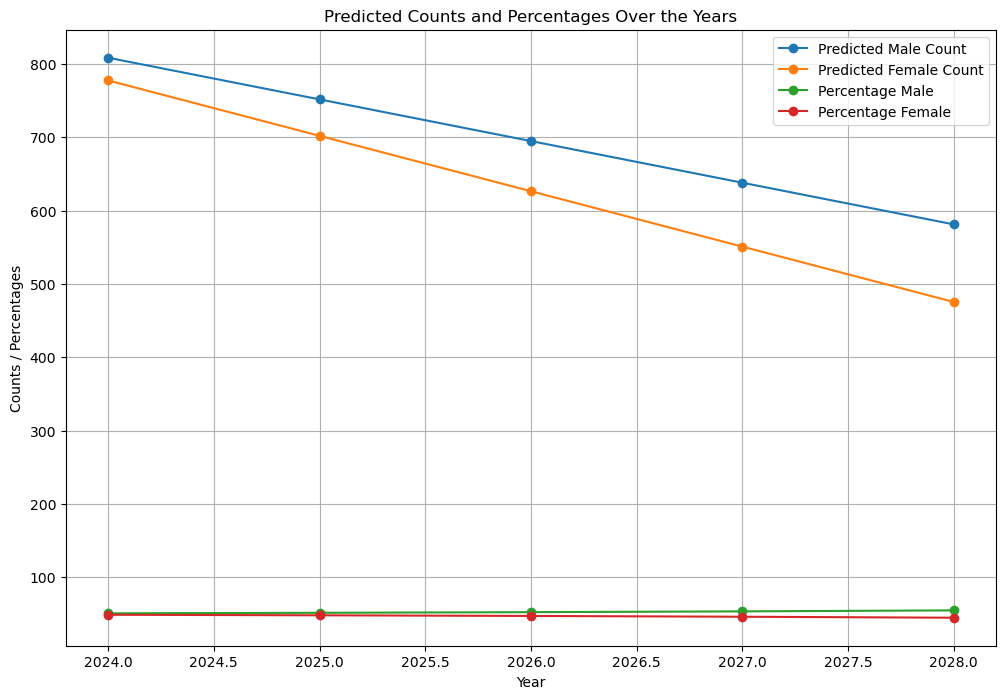

In [34]:
import matplotlib.pyplot as plt

# Assuming 'result' is your DataFrame with the provided data
# Modify this with your actual data
result_data = {
    'Year': [2024, 2025, 2026, 2027, 2028],
    'Predicted Male Count': [808.5, 751.7, 694.9, 638.1, 581.3],
    'Predicted Female Count': [777.5, 702.0, 626.5, 551.0, 475.5],
    'Percentage Male': [50.977301, 51.709431, 52.588164, 53.662434, 55.005678],
    'Percentage Female': [49.022699, 48.290569, 47.411836, 46.337566, 44.994322]
}

result = pd.DataFrame(result_data)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Predicted Male and Female Counts
plt.plot(result['Year'], result['Predicted Male Count'], label='Predicted Male Count', marker='o')
plt.plot(result['Year'], result['Predicted Female Count'], label='Predicted Female Count', marker='o')

# Plot Percentage Male and Female
plt.plot(result['Year'], result['Percentage Male'], label='Percentage Male', marker='o')
plt.plot(result['Year'], result['Percentage Female'], label='Percentage Female', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Counts / Percentages')
plt.title('Predicted Counts and Percentages Over the Years')
plt.legend()
plt.grid(True)
plt.show()

